# Unsupervised Learning Lab
###### Date: Oct 30th, 2023
###### Author: Khadija Hammawa

# Overview
1. Principle Component Analysis (PCA)
    - Application to Clinical Data
    - Preprocessing Data
    - Implementing PCA
    - Application to Face Images
2. Clustering: Application to Cardiac Data
    - Extracting features
    - Clustering
    - Implementing k-means algorithm
3. Conclusions

## Getting Started

In [1]:
# Load Libraries
import numpy as np
import scipy.io as sio
import pandas as pd
from scipy import stats
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Create Directory Paths
class dirs:
    ckd = 'C:/Users/obeyk/Desktop/UPF/Trimester 1/Data Science/Assignments/Unsupervised Learning/data/chronic_kidney_disease_ad.csv'
    faces = 'C:/Users/obeyk/Desktop/UPF/Trimester 1/Data Science/Assignments/Unsupervised Learning/data/faces.mat'
    cardio = 'C:/Users/obeyk/Desktop/UPF/Trimester 1/Data Science/Assignments/Unsupervised Learning/data/'

# 1. Principle Component Analysis (PCA)

## 1.1. Application to Clinical Data

In [3]:
col_names = ['age', 'bp', 'sg', 'al', 'su', 
           'rbc', 'pc', 'pcc','ba', 'bgr',
           'bu', 'sc', 'sod', 'pot','hemo', 
           'pcv', 'wc', 'rc', 'htn','dm', 
           'cad', 'appet', 'pe', 'ane','class']

In [4]:
ckd = pd.read_csv(dirs.ckd, names=col_names)

In [5]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


### 1.1.1 Pre-processing of the data

In [6]:
print(f'The original shape of the data: {ckd.shape[0]} rows (patients) and {ckd.shape[1]} columns (features)')
print()
print(f'The number of missing data before preprocessing: {ckd.isna().sum().sum()}')

The original shape of the data: 400 rows (patients) and 25 columns (features)

The number of missing data before preprocessing: 1012


In [7]:
df = ckd.copy()

In [8]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.205514,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# numeric
num_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 
           'pot', 'hemo', 'pcv', 'wc', 'rc']

# nominal
nom_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# ordinal
med_cols = ['sg', 'al', 'su']

### Question 1: Filling in Missing Values

When dealing with missing values it is important to take careful consideration into the nature of your dataset. For the chronic kidney disease set, there were several feature types-numeric, categorical, and ordinal. For this reason, I decided to employ different techniques to fit the nature of each variable type. 
For numeric (continuous) features I used the mean since the dispersion of data can mitigate the effects of introducing significant bias in your data's overall tendency. Conversely, I chose the mode to replace missing categorical variables. Categorical variables are not random nor do they have an inherent ordered relationship. Therefore the mode allows you to choose a representative category. Lastly, to address nominal variables, I used the median instead. Unlike categorical variables, nominal values share an ordinal relationship and the median can account for this. 

In [10]:
# fill missing values for numeric columns with mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [11]:
# fill missing values for categorical columns w mode
for col in nom_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
# fill missing values for ordinal columns w median
for col in med_cols:
    df[col] = df[col].fillna(df[col].median())

In [13]:
# check for missing values
print(f'The number of missing data before preprocessing: {ckd.isna().sum().sum()}')
print(f'The number of missing data after preprocessing: {df.isna().sum().sum()}')

The number of missing data before preprocessing: 1012
The number of missing data after preprocessing: 0


In [14]:
y = df['class']
X = df.drop('class', axis=1)

In [15]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0.0,1.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,0.0,0.0,0.0


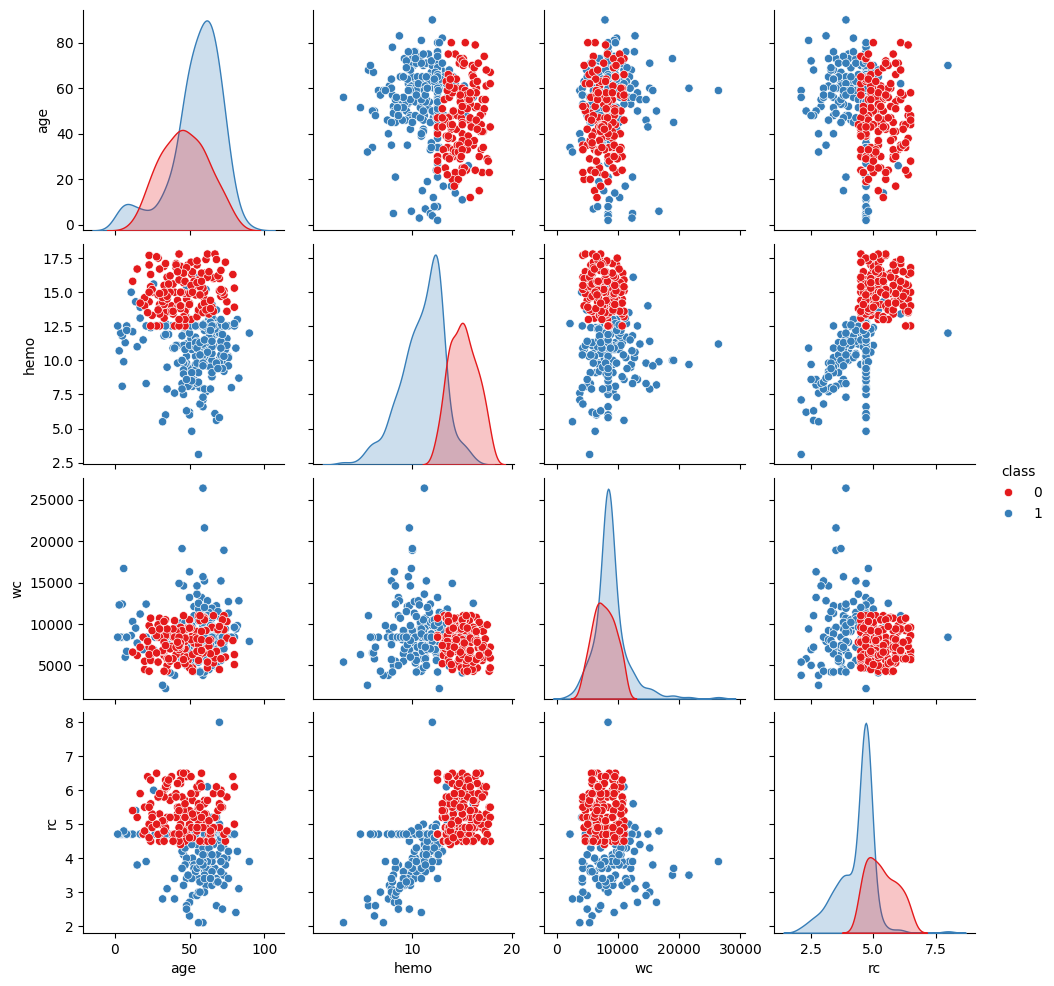

In [16]:
# Visualize scatter plots
# Select the columns of interest
cols_of_interest = ['age', 'hemo', 'wc', 'rc']
cols_of_interest = cols_of_interest + ['class']

# Create pair plot 
sns.pairplot(df[cols_of_interest], hue='class', palette='Set1')
plt.show()

## 1.2 Implementing PCA

### Question 2: Standarization & Unit Variance

The significance of standardizing your dataset before running your PCA is to ensure all variables are on the same scale. More specifically, they all have zero mean and unit variance. This preprocessing step makes it easier to compare their relative importance and introduce numeric stability. This becomes especially relevant in PCA where larger variables tend to dominate the analysis.

In [17]:
# Scale X
scaler = StandardScaler(with_std=True)
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

In [18]:
X_scaled.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.205464,0.262338,0.421486,0.076249,-0.380269,-0.36489,-0.484322,-0.342518,-0.241249,-0.361987,-0.435268,-0.333743,0.000000,0.000000,1.059271,0.628372,-0.240519,5.869017e-01,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084
1,-2.623810,-1.966580,0.421486,2.363728,-0.380269,-0.36489,-0.484322,-0.342518,-0.241249,0.000000,-0.800941,-0.405039,0.000000,0.000000,-0.452097,-0.108649,-0.954786,-1.058283e-15,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084
2,0.620313,0.262338,-1.421074,0.838742,2.507853,-0.36489,-0.484322,-0.342518,-0.241249,3.681441,-0.089909,-0.226800,0.000000,0.000000,-1.078762,-0.968506,-0.359563,-1.058283e-15,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476
3,-0.205464,-0.480635,-2.342354,2.363728,-0.380269,-0.36489,2.064742,2.919556,-0.241249,-0.415543,-0.028964,0.129677,-2.885831,-0.755345,-0.488960,-0.845669,-0.677016,-9.620759e-01,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476
4,-0.028511,0.262338,-1.421074,0.838742,-0.380269,-0.36489,-0.484322,-0.342518,-0.241249,-0.562820,-0.638420,-0.298096,0.000000,0.000000,-0.341509,-0.477159,-0.438926,-1.280110e-01,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084


In [19]:
X_scaled.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000
mean,5.062617e-16,7.815970e-16,3.183231e-14,3.552714e-17,-7.105427e-17,7.105427e-17,0.000000,1.776357e-17,-5.329071e-17,-1.598721e-16,1.243450e-16,3.552714e-17,0.000000,-6.661338e-17,0.000000,1.776357e-16,1.243450e-16,-2.842171e-16,3.552714e-17,-7.105427e-17,-9.769963e-17,-3.552714e-17,-1.776357e-17,0.000000
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252,1.001252e+00,1.001252,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252
min,-2.918730e+00,-1.966580e+00,-2.342354e+00,-6.862436e-01,-3.802694e-01,-3.648897e-01,-0.484322,-3.425178e-01,-2.412490e-01,-1.687482e+00,-1.136142e+00,-4.763339e-01,-14.471034,-7.553446e-01,-3.474833,-3.670915e+00,-2.462684e+00,-3.106814e+00,-7.622517e-01,-7.217427e-01,-3.047887e-01,-5.078008e-01,-4.843221e-01,-0.420084
25%,-5.593680e-01,-4.806345e-01,-4.997944e-01,-6.862436e-01,-3.802694e-01,-3.648897e-01,-0.484322,-3.425178e-01,-2.412490e-01,-6.297642e-01,-6.181044e-01,-3.872147e-01,-0.275081,-2.227225e-01,-0.608763,-5.999959e-01,-5.678913e-01,-2.471631e-01,-7.622517e-01,-7.217427e-01,-3.047887e-01,-5.078008e-01,-4.843221e-01,-0.420084
50%,1.484407e-01,1.311692e-01,4.214856e-01,-6.862436e-01,-3.802694e-01,-3.648897e-01,-0.484322,-3.425178e-01,-2.412490e-01,-2.950433e-01,-2.727461e-01,-2.980955e-01,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-1.058283e-15,-7.622517e-01,-7.217427e-01,-3.047887e-01,-5.078008e-01,-4.843221e-01,-0.420084
75%,7.382812e-01,2.623384e-01,4.214856e-01,8.387421e-01,-3.802694e-01,-3.648897e-01,-0.484322,-3.425178e-01,-2.412490e-01,2.628875e-02,8.784855e-02,0.000000e+00,0.377606,6.134259e-02,0.773586,6.283716e-01,3.943858e-01,4.677496e-01,1.311903e+00,1.385535e+00,-3.047887e-01,-5.078008e-01,-4.843221e-01,-0.420084
max,2.271867e+00,7.692067e+00,1.342766e+00,3.126221e+00,4.433268e+00,2.740554e+00,2.064742,2.919556e+00,4.145096e+00,4.578493e+00,6.776626e+00,1.299849e+01,2.770794,1.504578e+01,1.943975,1.856739e+00,7.140246e+00,3.923161e+00,1.311903e+00,1.385535e+00,3.280961e+00,1.969276e+00,2.064742e+00,2.380476


In [20]:
# 1. Calculate the covariance matrix
covariance_matrix = np.cov(X_scaled, rowvar=False)
covariance_matrix.shape

(24, 24)

In [21]:
# 2. Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [22]:
# 3. Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [23]:
# Calculate the explained variance for each component
explained_variances = eigenvalues / np.sum(eigenvalues)

In [24]:
n_components = 24

Text(0.5, 1.0, 'Principle Component Variance')

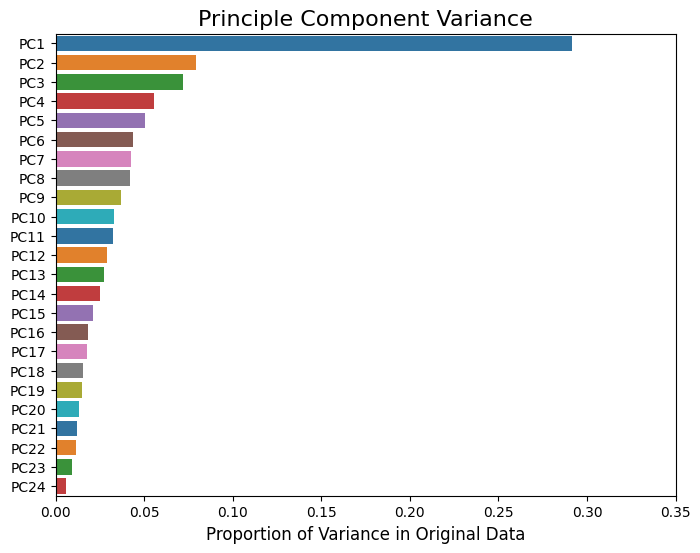

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=explained_variances, y=['PC' + str(i + 1) for i in range(n_components)], orient='h', palette='tab10')
plt.xlim(0,0.35)
plt.xlabel('Proportion of Variance in Original Data', size=12)
plt.title('Principle Component Variance', size=16)

In [26]:
# 4. Select the Top Eigenvectors
n_components_keep = 2 
selected_eigenvectors = eigenvectors[:, :n_components_keep]

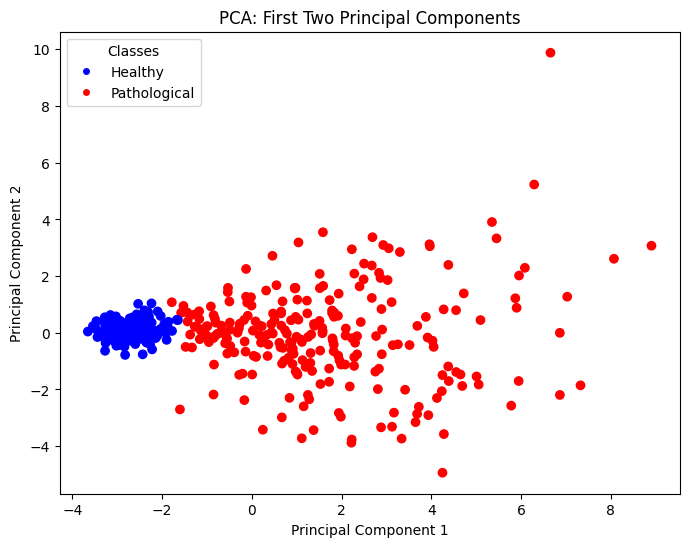

In [27]:
# 5. Project Data onto Principle Components
projected_data = np.dot(X_scaled, selected_eigenvectors)

# Define the classes and their corresponding labels
class_labels = [0, 1]
class_names = ['Healthy', 'Pathological']

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y, cmap='bwr')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')

# Create a custom legend with the correct colors
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=f'{class_names[i]}', markerfacecolor=scatter.to_rgba(class_labels[i])) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title='Classes', loc='best')

plt.show()

### Question 3 : PCA Chronic Kidney Disease Identifcation

Based on the new dimensions computed using PCA it is much easier to identify patients with chronic kidney disease. Since PCA finds the dimension with the greatest variance it allows you to telescope into the most relevant features for seperating between health and pathological.

### Question 4: Smallest Number of Dimension for 90% Variance
The minimum number of dimensions to retain 90% of explained variance is **16**.



In [28]:
# Calculate the cumulative explained variance
cum_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Find the minimum number of dimensions for 90% explained variance
min_dimensions = np.argmax(cum_variance >= 0.90) + 1 

print(f"The minimum number of dimensions for 90% explained variance is: {min_dimensions}")

The minimum number of dimensions for 90% explained variance is: 16


In [48]:
# Recover data by projecting back onto higher-dimensional space
# Step 1: Project data onto lower-dimensional space
num_components_to_keep = 24
lower_dimensional_data = np.dot(X_scaled, selected_eigenvectors[:, :num_components_to_keep])

# Step 2: Reconstruct data by projecting back into the original high-dimensional space
reconstructed_data = np.dot(lower_dimensional_data, selected_eigenvectors[:, :num_components_to_keep].T)

# Step 3: Calculate the reconstruction error
#reconstruction_error = ((X_scaled - reconstructed_data) ** 2).mean()
reconstruction_error = np.sum(np.square(X_scaled - reconstructed_data))

In [49]:
reconstruction_error

age      0.854836
bp       0.879620
sg       0.582526
al       0.489365
su       0.525087
rbc      0.851099
pc       0.605309
pcc      0.722949
ba       0.844525
bgr      0.499272
bu       0.407111
sc       0.508816
sod      0.668117
pot      0.948009
hemo     0.271766
pcv      0.271555
wc       0.857428
rc       0.407715
htn      0.486160
dm       0.541158
cad      0.826639
appet    0.731035
pe       0.725484
ane      0.607098
dtype: float64

In [41]:
total_recon_error = reconstruction_error.sum()
print(total_recon_error)

15.11267795672481


In [38]:
import numpy as np
from sklearn.decomposition import PCA

# Generate or load your data (replace this with your actual data)
data = X_scaled  # Example data with 100 samples and 24 features

# Perform PCA with 24 components
pca = PCA(n_components=24)
pca.fit(data)

# Retain the top 10 principal components
n_components_to_retain = 10
reduced_data = pca.transform(data)[:, :n_components_to_retain]

# Reconstruct the data using the retained components
reconstructed_data = np.dot(reduced_data, pca.components_[:n_components_to_retain, :])
reconstructed_data += pca.mean_

# Calculate the reconstruction error
reconstruction_error = np.sum(np.square(data - reconstructed_data))

print("      Reconstruction Error:", reconstruction_error)
print()
print("Total Reconstruction Error:", reconstruction_error.sum())

      Reconstruction Error: age       8.914673
bp        3.422394
sg       28.562376
al       89.670331
su       58.871439
rbc      16.397234
pc       84.386609
pcc      28.357921
ba        5.898455
bgr      62.989759
bu       50.847566
sc       46.344353
sod      36.916191
pot      21.539491
hemo     58.219347
pcv      63.998647
wc        3.366709
rc       98.678214
htn      67.549532
dm       51.890105
cad      11.435039
appet     8.542712
pe       22.571855
ane      30.037839
dtype: float64

Total Reconstruction Error: 959.4087921982095


### Question 5

When I used 10 components to calculate the reconstruction error the result was 15.11. This number although high reveals deeper information when we look at the differences in reconstruction error between different features. There are some features that have poor reconstruction (i.e. age, appet, pot, rbc) while others have much better reconstruction (i.e. hemo, pcv). This demonstrates that overall hemo and pcv are represented better during PCA.

## 1.3 Application to face image data

In [ ]:
# Load the face dataset from faces.mat
faces = sio.loadmat(dirs.faces)
X = faces['X']

In [ ]:
# Visualize the first 100 faces
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i, :].reshape((32, 32)).T, cmap='gray')
    ax.axis('off')
plt.show()

In [ ]:
X_df = pd.DataFrame(X)
X_df.describe()

### Question 6

Standardizing data usually involves rescaling your data to have a mean of 0 and a standard deviation of 1. Standardization is used to handle situations in which variables have significant differences in scale. However, our dataset displayed consistent standard deviation, minimum, and maximum values across its features already exhibits a consistent standard deviations, minimum, and maximum values across its features.

In [ ]:
# Normalize Dataset
# Compute the mean of each feature (column)
mean = np.mean(X, axis=0)

# Subtract the mean from each data point
X_norm = X - mean

In [ ]:
# 1. Calculate the covariance matrix
covariance_matrix = np.cov(X_norm, rowvar=False)
covariance_matrix.shape

In [ ]:
# 2. Calculate Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
# 3. Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
num_components_to_visualize = 36  # Number of components to visualize
visualized_eigenvectors = eigenvectors[:, :num_components_to_visualize]

# Reshape the eigenvectors to 32x32 images
reshaped_components = []
for i in range(num_components_to_visualize):
    component_image = np.reshape(visualized_eigenvectors[:, i], (32, 32), order='F')  # Reshape to 32x32
    reshaped_components.append(component_image)

In [ ]:
# Create a grid of images for visualization
rows = 6  # You can adjust the number of rows and columns as needed
cols = 6

plt.figure(figsize=(12, 12))
for i in range(num_components_to_visualize):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(reshaped_components[i], cmap='gray')
    plt.title(f'PC {i + 1}')
    plt.axis('off')

plt.show()

In [ ]:
num_components_to_keep = 100
projected_data = np.dot(X_norm, eigenvectors[:, :num_components_to_keep])

In [ ]:
reconstructed_data = np.dot(projected_data, eigenvectors[:, :num_components_to_keep].T)

In [ ]:
# Number of faces to visualize
num_faces_to_visualize = 100

# Create a grid to display original and reconstructed faces
rows = 10  # Number of rows in the grid
cols = 10  # Number of columns in the grid

plt.figure(figsize=(12, 12))
for i in range(num_faces_to_visualize):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    original_face = np.reshape(X[i, :], (32, 32), order='F')
    plt.imshow(original_face, cmap='gray')
    plt.title('Orig')
    plt.axis('off')

    plt.subplot(rows, 2 * cols, 2 * i + 2)
    reconstructed_face = np.reshape(reconstructed_data[i, :], (32, 32), order='F')
    plt.imshow(reconstructed_face, cmap='gray')
    plt.title('Recon')
    plt.axis('off')

plt.show()

# 2. Clustering: application to cardiac data

## 2.1 Extracting features

In [ ]:
# Load The Data
cardiacShapes = sio.loadmat(dirs.cardio + 'cardiacShapes.mat')

shapeData = cardiacShapes['shapeData']
labelT = cardiacShapes['labelT']

In [ ]:
# Visualize Myocardial Shapes

colors = ['b' if labelT[i][0] == 1 else 'r' for i in range(len(labelT))]
alpha = 0.3  # Adjust the transparency level

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(shapeData)):
    x, y = shapeData[i][0], shapeData[i][1]
    ax.plot(x, y, color=colors[i], alpha=alpha)

ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')
ax.set_title('Myocardial Shapes')

# Create a legend with handles and labels for the colors
legend_labels = ['Healthy', 'Pathological']
legend_handles = [plt.Line2D([0], [0], color='b', label='Healthy'), plt.Line2D([0], [0], color='r', label='Pathological')]
ax.legend(handles=legend_handles, labels=legend_labels)

plt.show()

### Question 7: Myocardial Shapes

When you visualize the cardiac shapes of all participants it becomes apparent there clear differences between groups. Healthy individuals seem to have a less variable central line than pathological participants. Additionally, individuals suffering from heart diseases typically show longer curve lengths and more curvature in general along the centre line.

These findings highlight some key variables that may be worth exploring further. To begin, shape area reveals information about the overall structure and size of of the heart musculature. Similarly, curve length also provides useful information on the curvilinearity of the myocardium. Finally, the apex curvature also piqued my interest since in the cardiac shapes visualization it appeared as though healthy individuals displayed a much sharper curve than pathological participants.

In [ ]:
# Create lists to store the x-coordinates and associated y-values for the lowest y-coordinates
lowest_x_values = []
lowest_y_values = []

# Iterate through each patient's data
for patient_data in shapeData:
    # Extract the x-coordinates (first dimension, index 0) and y-coordinates (second dimension, index 1)
    x_coordinates = patient_data[0]
    y_coordinates = patient_data[1]

    # Find the index where the y-coordinate matches the lowest y-coordinate
    index = np.argmin(y_coordinates)
    
    # Get the corresponding x-coordinate at that index
    x_lowest = x_coordinates[index]

    # Store the x-coordinate and the associated y-value for this patient
    lowest_x_values.append(x_lowest)
    lowest_y_values.append(y_coordinates[index])

In [ ]:
lowest_coordinates = []

# Combine x and y coordinates into tuples and store them in the list
for x, y in zip(lowest_x_values, lowest_y_values):
    lowest_coordinates.append((x, y))

In [ ]:
# Feature Extraction: Curve length & Shape Area

curve_lengths = []
shape_areas = []

for i in range(len(shapeData)):
    x, y = shapeData[i][0], shapeData[i][1]
    # Calculate curve length
    length = np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))
    curve_lengths.append(length)
    # Calculate shape area
    pgon = Polygon(zip(x,y))
    area = pgon.area
    shape_areas.append(area)

In [ ]:
# Feature Extraction: Curve at Apex

curve_at_apex = []

# Calculate curvature at apex for each patient
def curve(x):
    return x**2

for patient in range(len(lowest_coordinates)):
    dx = 1e-6
    x_patient = lowest_coordinates[patient][0]  # Get the x-coordinate for the current patient

    y_prime = (curve(x_patient + dx) - curve(x_patient - dx)) / (2 * dx)

    # Calculate the second derivative using numerical differentiation
    y_double_prime = (curve(x_patient + dx) - 2 * curve(x_patient) + curve(x_patient - dx)) / (dx**2)

    # Calculate the curvature using the formula
    curvature = abs(x_patient * y_double_prime - y_prime) / (x_patient**2 + y_prime**2)**(3/2)
    curve_at_apex.append(curvature)

In [ ]:
# Create a scatter plot matrix
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define class labels
classes = ["Healthy", "Pathological"]

# Define corresponding colors
colors = ["yellow", "purple"]

# Create a legend
legend_labels = {label: color for label, color in zip(classes, colors)}
handles = [plt.Line2D([0], [0], marker="o", color="w", label=label, markerfacecolor=color) for label, color in legend_labels.items()]
plt.legend(handles=handles, title="Classes")

# Plot scatter plots
axs[0].scatter(curve_lengths, shape_areas, alpha=0.5, c=labelT)
axs[0].set_title('Curve Lengths vs. Shape Areas')
axs[0].set_xlabel('Curve Lengths')
axs[0].set_ylabel('Shape Areas')

axs[1].scatter(curve_lengths, curve_at_apex, alpha=0.5, c=labelT)
axs[1].set_title('Curve Lengths vs. Curvature at Apex')
axs[1].set_xlabel('Curve Lengths')
axs[1].set_ylabel('Curvature at Apex')

axs[2].scatter(shape_areas, curve_at_apex, alpha=0.5, c=labelT)
axs[2].set_title('Shape Areas vs. Curvature at Apex')
axs[2].set_xlabel('Shape Areas')
axs[2].set_ylabel('Curvature at Apex')

plt.show()

## 2.2 Clustering

### 2.2.1 Implementing k-means algorithm

In [ ]:
num_subjects, num_coordinates, num_points = shapeData.shape

# Reshape the data into a 2D array
reshaped_data = shapeData.reshape(num_subjects, num_coordinates * num_points)

In [ ]:
# 1. Initialization
def kMeansInitCentroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(m)
    
    # Take the first k examples as initial centroids
    centroids = X[randidx[:k], :]
    
    return centroids

In [ ]:
# 2. Find the Closest Centroids
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m, dtype=int)
    
    for i in range(m):
        # Compute the distance between data point i and all centroids
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        
        # Find the centroid index with the minimum distance
        idx[i] = np.argmin(distances)
    
    return idx

In [ ]:
# 3. Recompute Centroids
def computeMeans(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        # Find all data points assigned to centroid i
        assigned_points = X[idx == i]
        
        # Calculate the mean of those points
        centroids[i] = np.mean(assigned_points, axis=0)
    
    return centroids

In [ ]:
# 4. Kmeans Algorithim
def kMeans(X, k, max_iters):
    # Initialize centroids
    centroids = kMeansInitCentroids(X, k)
    
    for iter in range(max_iters):
        # Cluster assignment step
        idx = findClosestCentroids(X, centroids)
        
        # Move centroid step
        centroids = computeMeans(X, idx, k)
    
    return centroids, idx

In [ ]:
def plotKMeans(X, idx, centroids):
    # Get unique cluster labels
    unique_labels = np.unique(idx)
    
    # Define a list of colors for plotting
    colors = ['c', 'r']

    # Plot data points for each cluster
    for label in unique_labels:
        cluster_indices = np.where(idx == label)
        cluster_points = X[cluster_indices]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[label], label=f'Cluster {label}', alpha=0.5)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='k', label='Centroids')

    plt.xlabel('distance')
    plt.ylabel('distance')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

In [ ]:
final_centroids, cluster_indices = kMeans(reshaped_data, k=2, max_iters=100)

# Visualize the clustering
plotKMeans(reshaped_data, cluster_indices, final_centroids)

In [ ]:
silhouette_avg = silhouette_score(reshaped_data, cluster_indices)
print("Silhouette Score:", silhouette_avg)

## Conclusions

In conclusion, I decided to use the Silhouette score to evaluate my KMeans clustering algorithm. Silhouette scores measure how similar a data point is to its own cluster compared to other clusters. Therefore, a higher silhouette score suggests the data point is better matched to its own cluster. Given my silhouette score of 0.31, suggests a moderate degree of cohesion among clusters and separation between cluster groups. When I compare these results with the visualization it becomes apparent that KMeans may not be the most suitable clustering technique. Further analysis could opt to refine feature engineering techniques or alternative clustering techniques such as hierarchical clustering. It is important to note that class imbalance is present in the dataset, however, I attempted a sub-analysis to see if addressing the imbalance by incorporating sample weights into my KMeans algorithm might improve my score. Surprisingly, there was no significant difference between the scores suggesting that it may be worth exploring other opportunities to optimize and improve our clustering methodology.